# Reading the parquet file

## importing the libraries and reading the Parquet file

In [101]:

import gc
import polars as pl
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import seaborn as sns



train = pl.read_parquet('../data/train.parquet')
test = pl.read_parquet('../data/test.parquet')

In [102]:
train.head()

session,aid,ts,type
i64,i64,i64,u8
0,1517085,1659304800025,0
0,1563459,1659304904511,0
0,1309446,1659367439426,0
0,16246,1659367719997,0
0,1781822,1659367871344,0


In [103]:
test.head()

session,aid,ts,type
i64,i64,i64,u8
12899779,59625,1661724000278,0
12899780,1142000,1661724000378,0
12899780,582732,1661724058352,0
12899780,973453,1661724109199,0
12899780,736515,1661724136868,0


In [104]:
train['type'].unique()

type
u8
0
1
2


In [105]:
train['aid'].n_unique()

1855603

In [106]:
train['session'].n_unique()

12899779

In [107]:
train.describe()

describe,session,aid,ts,type
str,f64,f64,f64,f64
"""count""",2.16716096e8,2.16716096e8,2.16716096e8,2.16716096e8
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",4.7028e6,928805.229105,1.6605e12,0.125021
"""std""",3.6650e6,536691.747782,6.9615e8,0.395534
"""min""",0.0,0.0,1.6593e12,0.0
"""max""",1.2899778e7,1.855602e6,1.6617e12,2.0
"""median""",3.915777e6,928109.0,1.6605e12,0.0


In [108]:
df = train

In [109]:
df

session,aid,ts,type
i64,i64,i64,u8
0,1517085,1659304800025,0
0,1563459,1659304904511,0
0,1309446,1659367439426,0
0,16246,1659367719997,0
0,1781822,1659367871344,0
0,1152674,1659367885796,0
0,1649869,1659369893840,1
0,461689,1659369898050,1
0,305831,1659370027105,2


In [110]:
#sns.histplot(data=df, x="type")

In [114]:
q = (
    df.lazy()
    .groupby("session")
    .agg(
        [
            (pl.col("type") == 0).sum().alias("click"),
            (pl.col("type") == 1).sum().alias("cart"),
            (pl.col("type") == 2).sum().alias("order"),
        ]
    )
    .sort("click", reverse=False)
    
)

df_type = q.collect()

In [115]:
df_type.shape

(12899779, 4)

In [116]:
df_type.head(10)

session,click,cart,order
i64,u32,u32,u32
10485760,2,0,0
2097152,2,1,0
10583944,2,0,0
8584976,2,0,0
12779280,2,0,0
8683160,2,0,0
10780312,2,0,0
8781344,2,0,0
4587040,2,0,0


In [117]:
multi_filter_df = df_type.filter((pl.col("click") > 2) & (pl.col("cart") < 1 ) & (pl.col("order") < 1 ))

In [118]:
multi_filter_df 

session,click,cart,order
i64,u32,u32,u32
8486792,3,0,0
10682128,3,0,0
6978744,3,0,0
11467600,3,0,0
7371480,3,0,0
11663968,3,0,0
3275360,3,0,0
9665000,3,0,0
1276392,3,0,0


In [119]:
multi_filter_df_hole = df_type.filter(pl.col("click") > 2)

<AxesSubplot:xlabel='click', ylabel='order'>

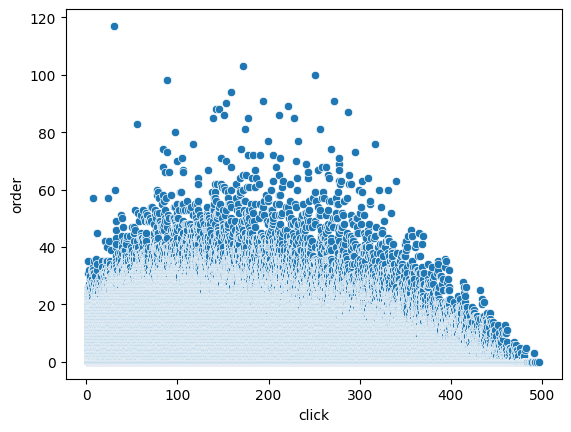

In [120]:
sns.scatterplot(data = df_type, x="click", y="order")

<AxesSubplot:xlabel='click', ylabel='order'>

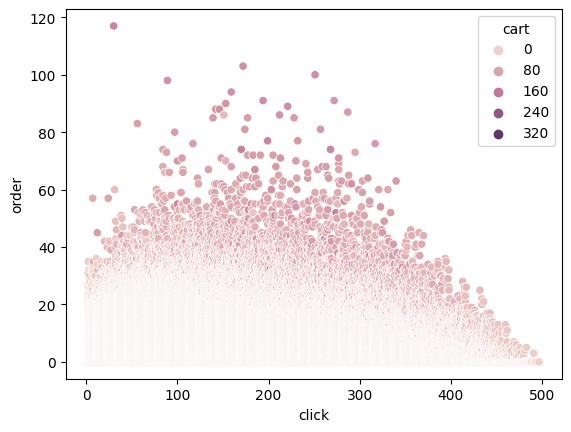

In [121]:
sns.scatterplot(data = df_type, x="click", y="order", hue="cart")

<AxesSubplot:xlabel='cart', ylabel='order'>

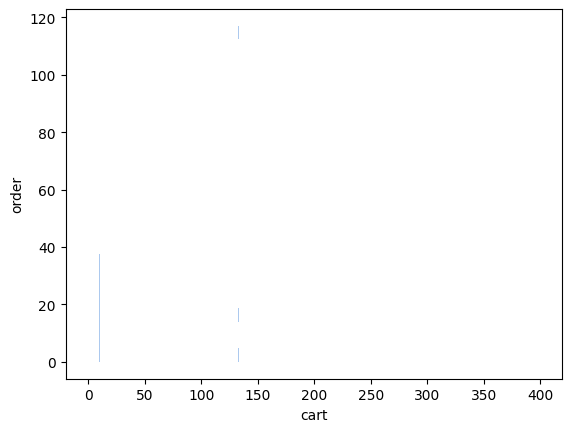

In [122]:
sns.histplot(data=df_type, x="cart", y="order")

https://www.kaggle.com/code/mvvppp/otto-eda-to-getting-started